In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
demo1=pd.read_csv("api_data_aadhar_demographic\\api_data_aadhar_demographic\\api_data_aadhar_demographic_0_500000.csv")
demo2=pd.read_csv("api_data_aadhar_demographic\\api_data_aadhar_demographic\\api_data_aadhar_demographic_500000_1000000.csv")
demo3=pd.read_csv("api_data_aadhar_demographic\\api_data_aadhar_demographic\\api_data_aadhar_demographic_1000000_1500000.csv")
demo4=pd.read_csv("api_data_aadhar_demographic\\api_data_aadhar_demographic\\api_data_aadhar_demographic_1500000_2000000.csv")
demo5=pd.read_csv("api_data_aadhar_demographic\\api_data_aadhar_demographic\\api_data_aadhar_demographic_2000000_2071700.csv")
#merging all demographic data files into a single dataframe
demographic=pd.concat([demo1,demo2,demo3,demo4,demo5],ignore_index=True)

In [9]:
#verifying the merged dataframe
#verifying the merge
print(
    len(demo1) + len(demo2) + len(demo3) + len(demo4) + len(demo5),
    len(demographic)
)

2071700 2071700


In [10]:
print("Demographic Dataset:")
print("\n\nHead about the dataset:")
print(demographic.head())
print("----------------------------------------")
print("\n\nShape about the dataset:")
print(demographic.shape)
print("----------------------------------------")
print("\n\nColumns about the dataset:")
print(demographic.columns)
print("----------------------------------------")
print("\n\nNumber of duplicated rows in the dataset:")
print(demographic.duplicated().sum())
print("----------------------------------------")
print("\n\nInformation about the dataset:")
print(demographic.info())
print("----------------------------------------")
print("\n\nStatistical summary of the dataset:")
print(demographic.describe())
print("----------------------------------------")
print("\n\nChecking for missing values in each column:")
print(demographic.isnull().sum())

Demographic Dataset:


Head about the dataset:
         date           state    district  pincode  demo_age_5_17  \
0  01-03-2025   Uttar Pradesh   Gorakhpur   273213             49   
1  01-03-2025  Andhra Pradesh    Chittoor   517132             22   
2  01-03-2025         Gujarat      Rajkot   360006             65   
3  01-03-2025  Andhra Pradesh  Srikakulam   532484             24   
4  01-03-2025       Rajasthan     Udaipur   313801             45   

   demo_age_17_  
0           529  
1           375  
2           765  
3           314  
4           785  
----------------------------------------


Shape about the dataset:
(2071700, 6)
----------------------------------------


Columns about the dataset:
Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17',
       'demo_age_17_'],
      dtype='object')
----------------------------------------


Number of duplicated rows in the dataset:
473601
----------------------------------------


Information about the dataset:
<cl

In [11]:
#converting date columns to datetime format
demographic['date'] = pd.to_datetime(demographic['date'], format='%d-%m-%Y')
#verifying the conversion
print(demographic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   date           datetime64[ns]
 1   state          object        
 2   district       object        
 3   pincode        int64         
 4   demo_age_5_17  int64         
 5   demo_age_17_   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 94.8+ MB
None


PINCODE DATASET INFORMATION

In [12]:
pincode=pd.read_csv("cleaned dataset\\final_pincode.csv")

C:\Users\JYOTI GUPTA\AppData\Local\Temp\ipykernel_27852\1518679534.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  pincode=pd.read_csv("cleaned dataset\\final_pincode.csv")


In [13]:
#Ensure columns are strings and convert to title case
pincode['state'] = pincode['state'].astype(str).str.title()
pincode['district'] = pincode['district'].astype(str).str.title()

In [14]:
print("Pincode Dataset:")
print("\n\nHead about the dataset:")
print(pincode.head())
print("----------------------------------------")
print("\n\nShape about the dataset:")
print(pincode.shape)
print("----------------------------------------")
print("\n\nColumns about the dataset:")
print(pincode.columns)
print("----------------------------------------")
print("\n\nNumber of duplicated rows in the dataset:")
print(pincode.duplicated().sum())
print("----------------------------------------")
print("\n\nInformation about the dataset:")
print(pincode.info())
print("----------------------------------------")
print("\n\nStatistical summary of the dataset:")
print(pincode.describe())
print("----------------------------------------")
print("\n\nChecking for missing values in each column:")
print(pincode.isnull().sum())

Pincode Dataset:


Head about the dataset:
    pincode                district      state Unnamed: 3
0  504273.0  Kumuram Bheem Asifabad  Telangana        NaN
1  504299.0  Kumuram Bheem Asifabad  Telangana        NaN
2  504296.0  Kumuram Bheem Asifabad  Telangana        NaN
3  504209.0              Mancherial  Telangana        NaN
4  504272.0              Mancherial  Telangana        NaN
----------------------------------------


Shape about the dataset:
(172775, 4)
----------------------------------------


Columns about the dataset:
Index(['pincode', 'district', 'state', 'Unnamed: 3'], dtype='object')
----------------------------------------


Number of duplicated rows in the dataset:
148746
----------------------------------------


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172775 entries, 0 to 172774
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   pincode     24025 non-nu

In [15]:
#checking unique values in pincode dataframe
pincode[['pincode','district','state']].nunique()

pincode     20490
district      789
state          37
dtype: int64

In [16]:
pincode.rename(columns={'pincode': 'pincode_master', 'district': 'district_master', 'state': 'state_master'}, inplace=True)

In [17]:
pincode.groupby('pincode_master').size().sort_values(ascending=False)

pincode_master
535273.0    4
853204.0    4
795145.0    4
612203.0    4
193501.0    4
           ..
854326.0    1
854327.0    1
854328.0    1
854329.0    1
854330.0    1
Length: 20490, dtype: int64

In [18]:
pincode = (
    pincode
    .groupby('pincode_master', as_index=False)
    .agg({
        'district_master': 'first',
        'state_master': 'first'
    })
)

In [19]:
pincode_count_by_state = (
    pincode
    .groupby('state_master')['pincode_master']
    .nunique()
    .sort_values(ascending=False)
)

print(pincode_count_by_state)


state_master
Tamil Nadu                                  2108
Uttar Pradesh                               1800
Maharashtra                                 1650
Kerala                                      1439
Karnataka                                   1409
West Bengal                                 1383
Andhra Pradesh                              1257
Gujarat                                     1080
Rajasthan                                   1048
Odisha                                       978
Bihar                                        965
Madhya Pradesh                               823
Telangana                                    702
Assam                                        585
Punjab                                       550
Himachal Pradesh                             459
Jharkhand                                    402
Haryana                                      326
Uttarakhand                                  314
Chhattisgarh                                 290
Jammu A

In [20]:
pincode_count_by_district = (
    pincode
    .groupby(['state_master', 'district_master'])['pincode_master']
    .nunique()
    .reset_index(name='pincode_count')
)
pincode_count_by_district

,state_master,district_master,pincode_count
0,Andaman And Nicobar Islands,Nicobar,4
1,Andaman And Nicobar Islands,North And Middle Andaman,7
2,Andaman And Nicobar Islands,South Andaman,11
3,Andhra Pradesh,Alluri Sitharama Raju,19
4,Andhra Pradesh,Anakapalli,24
...,...,...,...
783,West Bengal,Purba Bardhaman,87
784,West Bengal,Purba Medinipur,102
785,West Bengal,Purulia,44
786,West Bengal,South 24 Parganas,79


In [21]:
pincode_conflicts = (
    pincode
    .groupby('pincode_master')
    .agg({
        'state_master': 'nunique',
        'district_master': 'nunique'
    })
    .query('state_master > 1 or district_master > 1')
)

print(pincode_conflicts)


Empty DataFrame
Columns: [state_master, district_master]
Index: []


In [22]:
pincode = (
    pincode
    .drop_duplicates(subset=['pincode_master'])
    [['pincode_master', 'state_master', 'district_master']]
)


In [23]:
# Ensure pincode is consistent datatype
#master_pincode_df['pincode_master'] = master_pincode_df['pincode_master'].astype(int)

# Final geography dimension (PK = pincode_master)
pincode_final = (
    pincode
    .drop_duplicates(subset=['pincode_master'])
    [['pincode_master', 'state_master', 'district_master']]
)

# Safety check
assert pincode_final['pincode_master'].is_unique, "Duplicate pincodes in geography dimension!"


STATE & DISTRICT MAPPING

In [24]:
demographic = demographic.merge(
    pincode_final,
    left_on='pincode',           # FK in fact table
    right_on='pincode_master',   # PK in dimension table
    how='left',
    validate='many_to_one'       # FK → PK enforcement
)

In [25]:
assert demographic.shape[0] == demographic.shape[0], \
       "Row count changed after geography enrichment!"


In [26]:
unmatched = demographic['state_master'].isna().sum()
print("Unmatched pincodes:", unmatched)


Unmatched pincodes: 2


In [27]:
demographic[['pincode', 'pincode_master', 'state_master', 'district_master']].nunique()

pincode            19742
pincode_master     19741
state_master          36
district_master      779
dtype: int64

In [28]:
demographic.shape

(2071700, 9)

In [29]:
unmatched_rows = demographic[
    demographic['state_master'].isna()
]

unmatched_rows[['pincode', 'state', 'district']].head(20)


,pincode,state,district
795161,100000,100000,100000
2007370,100000,100000,100000


In [30]:
unmatched_pincodes = (
    demographic
    .loc[demographic['state_master'].isna(), 'pincode']
    .dropna()
    .unique()
)

len(unmatched_pincodes)

1

In [31]:
unmatched_pincodes.tolist()

[100000]

In [32]:
# Removing rows with pincode 100000 as it is invalid
demographic = demographic[
    demographic['pincode'] != 100000
]

In [33]:
# verifying the removal
100000 in demographic['pincode'].values

False

HANDLING DUPLICATES VALUE AFTER STATE & DISTRICT MAPPING

In [34]:
demographic.duplicated().sum()

np.int64(473601)

In [35]:
#understanding the duplicated rows
dup_keys = demographic.duplicated(
    subset=['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_', 'pincode_master', 'state_master', 'district_master'],
    keep=False
)
demographic[dup_keys].head(10)

,date,state,district,pincode,demo_age_5_17,demo_age_17_,pincode_master,state_master,district_master
113325,2025-10-18,Karnataka,Belagavi,591313,0,1,591313.0,Karnataka,Belagavi
113326,2025-10-18,Karnataka,Belagavi,591315,0,1,591315.0,Karnataka,Belagavi
113327,2025-10-18,Karnataka,Belagavi,591316,0,1,591316.0,Karnataka,Belagavi
113328,2025-10-18,Karnataka,Belgaum,590009,0,1,590009.0,Karnataka,Belagavi
113329,2025-10-18,Karnataka,Belgaum,591101,1,6,591101.0,Karnataka,Belagavi
113330,2025-10-18,Karnataka,Belgaum,591106,1,5,591106.0,Karnataka,Belagavi
113331,2025-10-18,Karnataka,Belgaum,591113,0,2,591113.0,Karnataka,Belagavi
113332,2025-10-18,Karnataka,Belgaum,591115,1,3,591115.0,Karnataka,Belagavi
113333,2025-10-18,Karnataka,Belgaum,591118,2,2,591118.0,Karnataka,Belagavi
113334,2025-10-18,Karnataka,Belgaum,591121,0,6,591121.0,Karnataka,Belagavi


In [36]:
#verifying all duplicated rows
dup_rows = demographic[dup_keys].sort_values(
    by=['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_',
       'pincode_master', 'state_master', 'district_master']
)
dup_rows.head(20)

,date,state,district,pincode,demo_age_5_17,demo_age_17_,pincode_master,state_master,district_master
831438,2025-03-01,Andaman and Nicobar Islands,Nicobar,744301,16,180,744301.0,Andaman And Nicobar Islands,Nicobar
1658910,2025-03-01,Andaman and Nicobar Islands,Nicobar,744301,16,180,744301.0,Andaman And Nicobar Islands,Nicobar
418053,2025-03-01,Andaman and Nicobar Islands,North And Middle Andaman,744202,10,201,744202.0,Andaman And Nicobar Islands,North And Middle Andaman
1245525,2025-03-01,Andaman and Nicobar Islands,North And Middle Andaman,744202,10,201,744202.0,Andaman And Nicobar Islands,North And Middle Andaman
416304,2025-03-01,Andhra Pradesh,Adilabad,504105,17,61,504105.0,Telangana,Nirmal
1243776,2025-03-01,Andhra Pradesh,Adilabad,504105,17,61,504105.0,Telangana,Nirmal
418216,2025-03-01,Andhra Pradesh,Adilabad,504205,12,107,504205.0,Telangana,Mancherial
1245688,2025-03-01,Andhra Pradesh,Adilabad,504205,12,107,504205.0,Telangana,Mancherial
416624,2025-03-01,Andhra Pradesh,Adilabad,504206,17,83,504206.0,Telangana,Mancherial
1244096,2025-03-01,Andhra Pradesh,Adilabad,504206,17,83,504206.0,Telangana,Mancherial


In [37]:
#counting duplicates based on key columns
dup_value_check = (
    demographic
    .groupby(['date', 'state', 'district', 'pincode','pincode_master', 'state_master', 'district_master'])
    [['demo_age_5_17', 'demo_age_17_']]
    .nunique()
    .reset_index()
)

dup_value_check[
    (dup_value_check['demo_age_5_17'] > 1) |
    (dup_value_check['demo_age_17_'] > 1)
].head()


,date,state,district,pincode,pincode_master,state_master,district_master,demo_age_5_17,demo_age_17_


In [38]:
# Saving the cleaned demographic data after removing duplicates by aggregating the counts
demographic = (
    demographic
    .groupby(['date', 'state', 'district', 'pincode','pincode_master', 'state_master', 'district_master'], as_index=False)
    .agg({
        'demo_age_5_17': 'sum',
        'demo_age_17_': 'sum'    })
)


In [39]:
#verifying the cleaned raw data
print("Shape of original demographic data:", demographic.shape)

Shape of original demographic data: (1598097, 9)


COMPARISON OF MATCHED & UNMATCHED DATA

In [40]:
# Normalizing text columns for comparison
def normalize(col):
    return (
        col.astype(str)
           .str.strip()
           .str.upper()
    )

df = demographic.copy()

df['state_norm'] = normalize(df['state'])
df['state_master_norm'] = normalize(df['state_master'])

df['district_norm'] = normalize(df['district'])
df['district_master_norm'] = normalize(df['district_master'])


In [41]:
# State comparison
state_total = len(df)

state_matched = (df['state_norm'] == df['state_master_norm']).sum()
state_mismatched = state_total - state_matched

state_match_pct = round((state_matched / state_total) * 100, 2)
state_mismatch_pct = round((state_mismatched / state_total) * 100, 2)

print("STATE COMPARISON")
print("----------------")
print(f"Total rows      : {state_total}")
print(f"Matched rows    : {state_matched} ({state_match_pct}%)")
print(f"Mismatched rows : {state_mismatched} ({state_mismatch_pct}%)")


STATE COMPARISON
----------------
Total rows      : 1598097
Matched rows    : 1547552 (96.84%)
Mismatched rows : 50545 (3.16%)


In [42]:
# District comparison
district_matched = (df['district_norm'] == df['district_master_norm']).sum()
district_mismatched = state_total - district_matched

district_match_pct = round((district_matched / state_total) * 100, 2)
district_mismatch_pct = round((district_mismatched / state_total) * 100, 2)

print("\nDISTRICT COMPARISON")
print("------------------")
print(f"Matched rows    : {district_matched} ({district_match_pct}%)")
print(f"Mismatched rows : {district_mismatched} ({district_mismatch_pct}%)")



DISTRICT COMPARISON
------------------
Matched rows    : 1111232 (69.53%)
Mismatched rows : 486865 (30.47%)


In [43]:
# Overall geo quality
both_matched = (
    (df['state_norm'] == df['state_master_norm']) &
    (df['district_norm'] == df['district_master_norm'])
).sum()

both_match_pct = round((both_matched / state_total) * 100, 2)

print("\nOVERALL GEO QUALITY")
print("------------------")
print(f"Fully matched rows : {both_matched} ({both_match_pct}%)")



OVERALL GEO QUALITY
------------------
Fully matched rows : 1089965 (68.2%)


In [44]:
# Identifying state mismatches for verification
state_mismatch_df = df[df['state_norm'] != df['state_master_norm']][
    ['pincode', 'state', 'state_master']
]

state_mismatch_df.head(10)


,pincode,state,state_master
6,504001,Andhra Pradesh,Telangana
7,504103,Andhra Pradesh,Telangana
8,504105,Andhra Pradesh,Telangana
9,504109,Andhra Pradesh,Telangana
10,504201,Andhra Pradesh,Telangana
11,504205,Andhra Pradesh,Telangana
12,504206,Andhra Pradesh,Telangana
13,504207,Andhra Pradesh,Telangana
14,504215,Andhra Pradesh,Telangana
15,504216,Andhra Pradesh,Telangana


In [45]:
# Identifying district mismatches for verification
district_mismatch_df = df[df['district_norm'] != df['district_master_norm']][
    ['pincode', 'district', 'district_master']
]

district_mismatch_df.head(10)

,pincode,district,district_master
7,504103,Adilabad,Nirmal
8,504105,Adilabad,Nirmal
9,504109,Adilabad,Nirmal
10,504201,Adilabad,Mancherial
11,504205,Adilabad,Mancherial
12,504206,Adilabad,Mancherial
13,504207,Adilabad,Mancherial
14,504215,Adilabad,Mancherial
15,504216,Adilabad,Mancherial
16,504219,Adilabad,Mancherial


In [46]:
# Converting pincode columns to integer type for consistency
df['pincode_int'] = (
    pd.to_numeric(df['pincode'], errors='coerce')
      .astype('Int64')
)

df['pincode_master_int'] = (
    pd.to_numeric(df['pincode_master'], errors='coerce')
      .astype('Int64')
)

In [47]:
# Pincode comparison
pincode_total = len(df)

pincode_matched = (df['pincode_int'] == df['pincode_master_int']).sum()
pincode_mismatched = pincode_total - pincode_matched

pincode_match_pct = round((pincode_matched / pincode_total) * 100, 2)
pincode_mismatch_pct = round((pincode_mismatched / pincode_total) * 100, 2)

print("PINCODE COMPARISON")
print("------------------")
print(f"Total rows       : {pincode_total}")
print(f"Matched rows     : {pincode_matched} ({pincode_match_pct}%)")
print(f"Mismatched rows  : {pincode_mismatched} ({pincode_mismatch_pct}%)")


PINCODE COMPARISON
------------------
Total rows       : 1598097
Matched rows     : 1598097 (100.0%)
Mismatched rows  : 0 (0.0%)


UNCLEANED DATA VISUALIZATION

In [48]:
#exporting raw demographic data
demographic.to_csv("raw_demographic_data.csv",index=False)

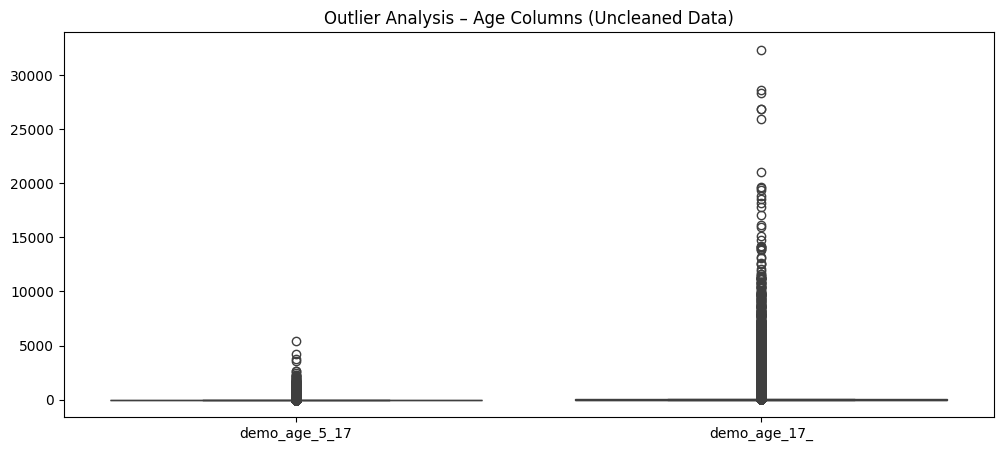

In [49]:
#BOX PLOT FOR AGE GROUPS
age_cols = ['demo_age_5_17', 'demo_age_17_']

plt.figure(figsize=(12, 5))
sns.boxplot(data=demographic[age_cols])
plt.title("Outlier Analysis – Age Columns (Uncleaned Data)")
plt.show()


In [50]:
#numeric outlier summary (IQR METHOD)
outlier_summary = {}

for col in age_cols:
    Q1 = demographic[col].quantile(0.25)
    Q3 = demographic[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = demographic[(demographic[col] < lower) | (demographic[col] > upper)]

    outlier_summary[col] = {
        "min": demographic[col].min(),
        "max": demographic[col].max(),
        "outlier_count": len(outliers)
    }

outlier_summary


{'demo_age_5_17': {'min': np.int64(0),
  'max': np.int64(5380),
  'outlier_count': 170169},
 'demo_age_17_': {'min': np.int64(0),
  'max': np.int64(32332),
  'outlier_count': 170951}}

In [51]:
#missing values check
demographic.isna().sum()

date               0
state              0
district           0
pincode            0
pincode_master     0
state_master       0
district_master    0
demo_age_5_17      0
demo_age_17_       0
dtype: int64

In [52]:
#invalid state records
valid_states = {
    'Andaman And Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
    'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
    'Dadra And Nagar Haveli And Daman And Diu', 'Delhi', 'Goa',
    'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir',
    'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep',
    'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
    'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
    'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
    'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'
}

invalid_state_rows = demographic[~demographic['state'].isin(valid_states)]

print("Invalid state records:", len(invalid_state_rows))
invalid_state_rows[['state', 'district', 'pincode']].head(10)


Invalid state records: 31405


,state,district,pincode
0,Andaman and Nicobar Islands,Nicobar,744301
1,Andaman and Nicobar Islands,North And Middle Andaman,744202
2,Andaman and Nicobar Islands,South Andaman,744101
3,Andaman and Nicobar Islands,South Andaman,744103
4,Andaman and Nicobar Islands,South Andaman,744105
5,Andaman and Nicobar Islands,South Andaman,744106
2638,Dadra and Nagar Haveli,Dadra and Nagar Haveli,396230
2639,Dadra and Nagar Haveli and Daman and Diu,Daman,396210
2640,Dadra and Nagar Haveli and Daman and Diu,Diu,362520
2641,Dadra and Nagar Haveli and Daman and Diu,Diu,362570


In [53]:
#pincode validity check
invalid_pincode = demographic[
    (~demographic['pincode'].astype(str).str.match(r'^\d{6}$'))
]

print("Invalid pincodes:", len(invalid_pincode))
invalid_pincode[['pincode']].head()


Invalid pincodes: 0


,pincode


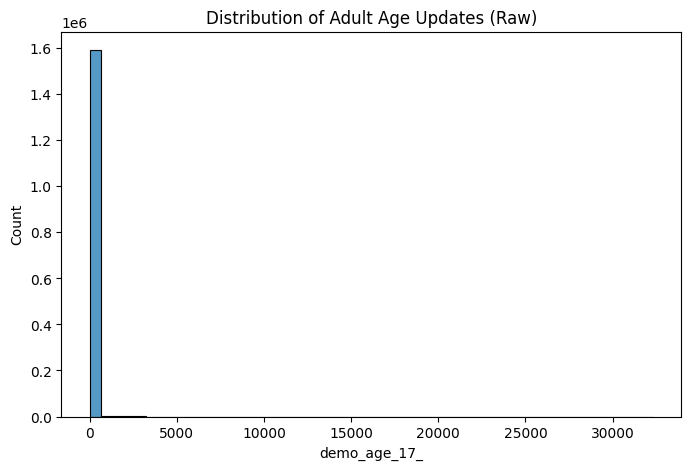

In [54]:
#histogram normal scale for demo_age_17_
plt.figure(figsize=(8, 5))
sns.histplot(demographic['demo_age_17_'], bins=50)
plt.title("Distribution of Adult Age Updates (Raw)")
plt.show()


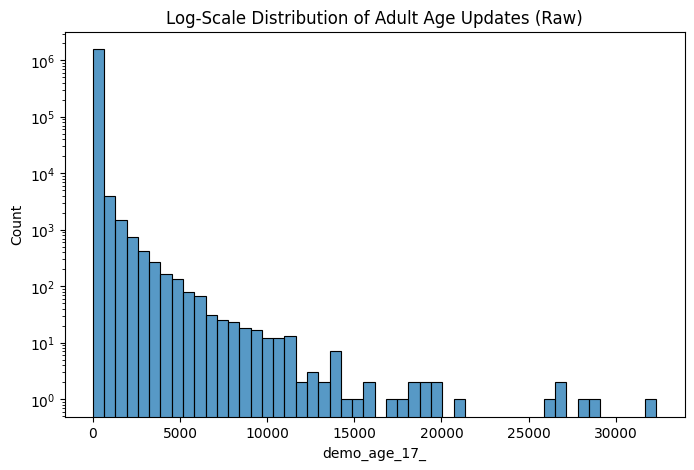

In [55]:
#histogram log scale for demo_age_17_
plt.figure(figsize=(8, 5))
sns.histplot(demographic['demo_age_17_'], bins=50)
plt.yscale('log')
plt.title("Log-Scale Distribution of Adult Age Updates (Raw)")
plt.show()


In [56]:
#overall summary statistics
eda_summary = pd.DataFrame({
    "Column": age_cols,
    "Min": demographic[age_cols].min().values,
    "Max": demographic[age_cols].max().values,
    "Mean": demographic[age_cols].mean().values,
    "Median": demographic[age_cols].median().values,
    "Skewness": demographic[age_cols].skew().values
})

eda_summary


,Column,Min,Max,Mean,Median,Skewness
0,demo_age_5_17,0,5380,3.043260,1.0,53.138130
1,demo_age_17_,0,32332,27.802919,7.0,44.933274


CLEANED DATA VISUALIZATION

In [57]:
#dropping redundant columns
demographic.drop(['state','district','pincode'], axis=1, inplace=True)

In [58]:
#renaming columns
demographic.rename(columns={
    'state_master': 'state',
    'district_master': 'district',
    'pincode_master': 'pincode'
}, inplace=True)

In [59]:
#reordering columns
new_order = ['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_']

In [60]:
demographic= demographic[new_order]
demographic.columns

Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17',
       'demo_age_17_'],
      dtype='object')

In [61]:
#fetching final cleaned demographic data
demographic.to_csv("cleaned_demographic_data.csv",index=False)

In [62]:
cleaned_df = pd.read_csv("cleaned_demographic_data.csv")
print("Shape:", cleaned_df.shape)

print("✅ Column Names:")
print(cleaned_df.columns)

print("✅ Missing Values (Top View):")
print(cleaned_df.isna().sum())

print("✅ Duplicate Rows Count:")
print(cleaned_df.duplicated().sum())

print("✅ Unique Value Counts:")
print("Unique States   :", cleaned_df['state_master'].nunique() if 'state_master' in cleaned_df.columns else cleaned_df['state'].nunique())
print("Unique Districts:", cleaned_df['district_master'].nunique() if 'district_master' in cleaned_df.columns else cleaned_df['district'].nunique())
print("Unique Pincodes :", cleaned_df['pincode'].nunique())

Shape: (1598097, 6)
✅ Column Names:
Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17',
       'demo_age_17_'],
      dtype='object')
✅ Missing Values (Top View):
date             0
state            0
district         0
pincode          0
demo_age_5_17    0
demo_age_17_     0
dtype: int64
✅ Duplicate Rows Count:
14418
✅ Unique Value Counts:
Unique States   : 36
Unique Districts: 779
Unique Pincodes : 19741


In [63]:
cleaned_df = (cleaned_df
    .groupby(['date', 'pincode','state','district'], as_index=False)
    [['demo_age_5_17', 'demo_age_17_']]
    .sum()
)

In [64]:
cleaned_df.duplicated(subset=['date', 'pincode','state','district']).sum()

np.int64(0)

In [65]:
print(cleaned_df.shape)
print(cleaned_df[['pincode','state','district']].nunique())

(1298158, 6)
pincode     19741
state          36
district      779
dtype: int64


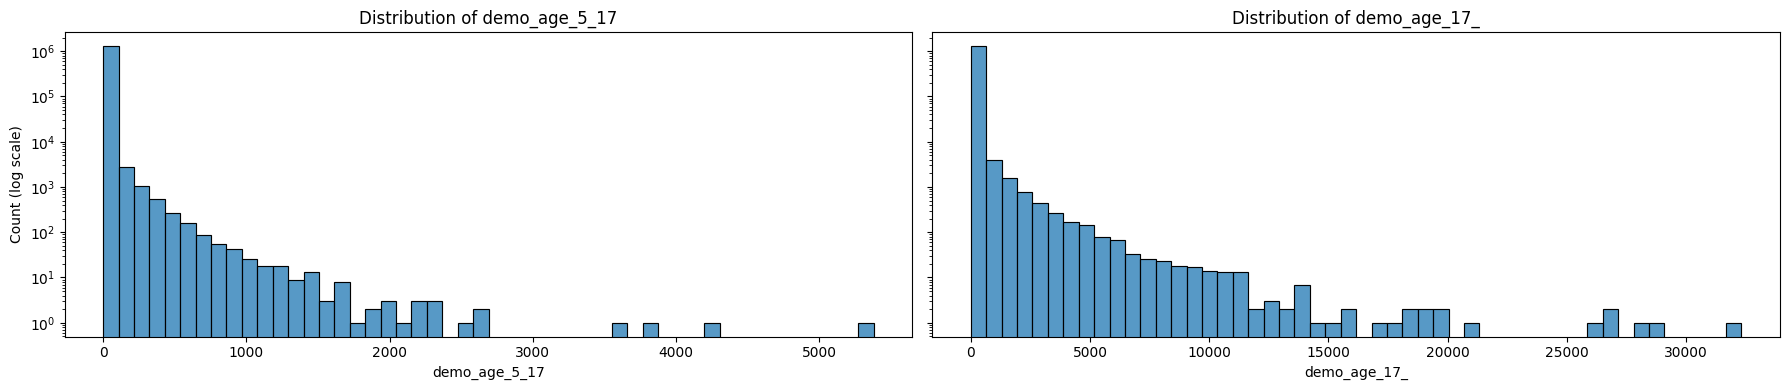

In [66]:
#histogram for age groups
cols = ['demo_age_5_17', 'demo_age_17_']

fig, axes = plt.subplots(1, 2, figsize=(18, 4), sharey=True)

for ax, c in zip(axes, cols):
    sns.histplot(cleaned_df[c], bins=50, ax=ax)
    ax.set_title(f"Distribution of {c}")
    ax.set_yscale("log")   # optional for heavy skew
    ax.set_xlabel(c)

axes[0].set_ylabel("Count (log scale)")
plt.tight_layout()
plt.show()

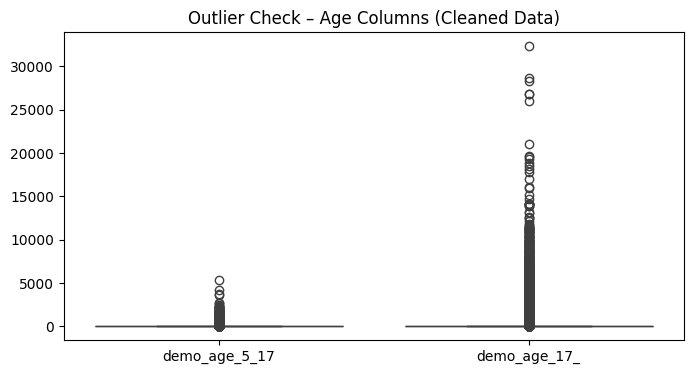

In [67]:
#outlier summary after cleaning
plt.figure(figsize=(8,4))
sns.boxplot(data=cleaned_df[cols])
plt.title("Outlier Check – Age Columns (Cleaned Data)")
plt.show()


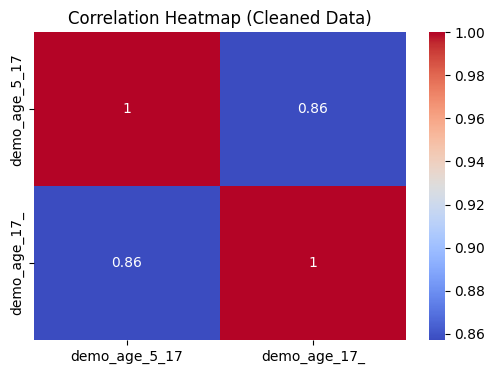

In [68]:
#correlation matrix
corr = cleaned_df[cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Cleaned Data)")
plt.show()


In [69]:
#date conversion into datetime format
cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])

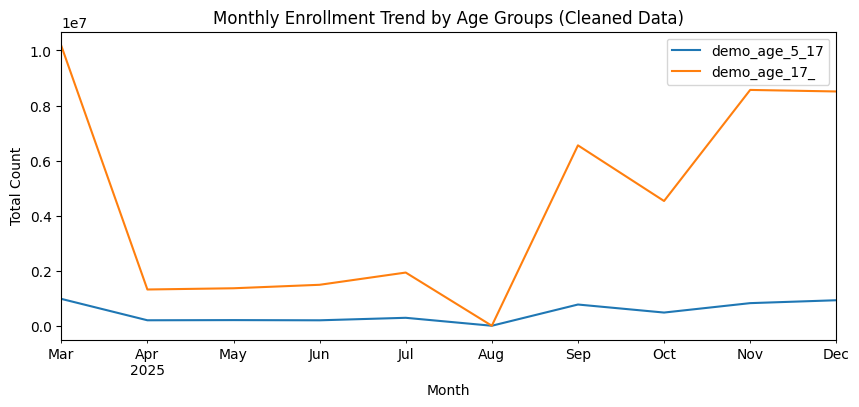

In [70]:
#time trend analysis
cols = ['demo_age_5_17', 'demo_age_17_']

cleaned_df['date'] = pd.to_datetime(cleaned_df['date'], dayfirst=True)

monthly = (
    cleaned_df
    .set_index('date')[cols]
    .resample("ME")     # month-end
    .sum()              # sum values inside each month
)

monthly.plot(figsize=(10,4))
plt.title("Monthly Enrollment Trend by Age Groups (Cleaned Data)")
plt.ylabel("Total Count")
plt.xlabel("Month")
plt.show()


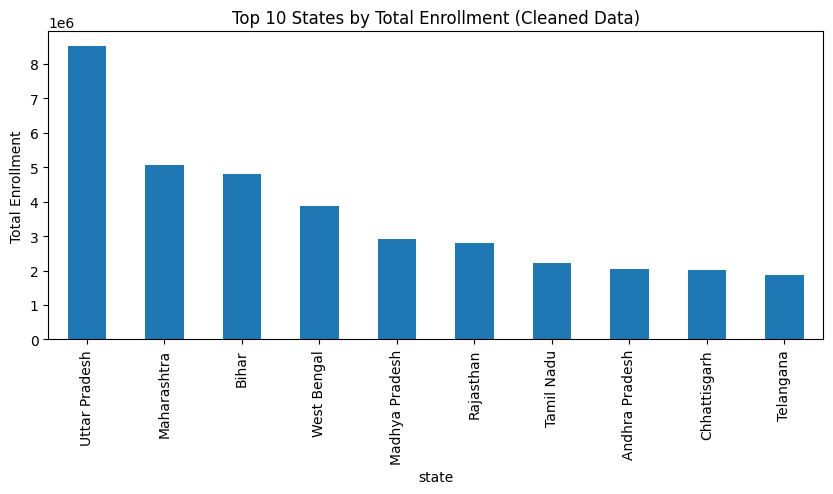

In [71]:
#top 10 state & district by total enrollments
cleaned_df['total_enrollment'] = cleaned_df[cols].sum(axis=1)

top_states = (
    cleaned_df.groupby('state')['total_enrollment']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_states.plot(kind="bar", figsize=(10,4))
plt.title("Top 10 States by Total Enrollment (Cleaned Data)")
plt.ylabel("Total Enrollment")
plt.show()


In [72]:
#before & after
raw_rows = demographic.shape[0]
clean_rows = cleaned_df.shape[0]

print("BEFORE vs AFTER CLEANING")
print("------------------------")
print("Raw rows        :", raw_rows)
print("Cleaned rows    :", clean_rows)
print("Reduction %     :", round((raw_rows-clean_rows)/raw_rows*100, 2), "%")
print("Unique pincodes :", cleaned_df['pincode'].nunique())
print("Unique states   :", cleaned_df['state'].nunique())
print("Unique districts:", cleaned_df['district'].nunique())


BEFORE vs AFTER CLEANING
------------------------
Raw rows        : 1598097
Cleaned rows    : 1298158
Reduction %     : 18.77 %
Unique pincodes : 19741
Unique states   : 36
Unique districts: 779


FEATURE ENGINEERING

In [73]:
#date,year,month
cleaned_df['year'] = cleaned_df['date'].dt.year
cleaned_df['month'] = cleaned_df['date'].dt.month
cleaned_df['month_name'] = cleaned_df['date'].dt.strftime('%B')


In [74]:
#quarter
cleaned_df['quarter'] = cleaned_df['date'].dt.quarter


In [75]:
#zone
zone_mapping = {
    # North
    "Jammu And Kashmir": "North",
    "Ladakh": "North",
    "Himachal Pradesh": "North",
    "Punjab": "North",
    "Haryana": "North",
    "Delhi": "North",
    "Chandigarh": "North",
    "Uttarakhand": "North",
    "Uttar Pradesh": "North",
    
    # West
    "Rajasthan": "West",
    "Gujarat": "West",
    "Goa": "West",
    "Maharashtra": "West",
    "Dadra And Nagar Haveli And Daman And Diu": "West",
    
    # Central
    "Madhya Pradesh": "Central",
    "Chhattisgarh": "Central",
    
    # East
    "Bihar": "East",
    "Jharkhand": "East",
    "West Bengal": "East",
    "Odisha": "East",
    
    # South
    "Andhra Pradesh": "South",
    "Telangana": "South",
    "Karnataka": "South",
    "Tamil Nadu": "South",
    "Kerala": "South",
    "Puducherry": "South",
    "Lakshadweep": "South",
    
    # North-East
    "Assam": "North-East",
    "Arunachal Pradesh": "North-East",
    "Manipur": "North-East",
    "Meghalaya": "North-East",
    "Mizoram": "North-East",
    "Nagaland": "North-East",
    "Sikkim": "North-East",
    "Tripura": "North-East",
    
    # Islands
    "Andaman And Nicobar Islands": "Islands"
}
cleaned_df['zone'] = cleaned_df['state'].map(zone_mapping)


In [76]:
#checking missing zone values
cleaned_df['zone'].isna().sum()


np.int64(0)

In [77]:
#new order of columns
cleaned_df = cleaned_df[
    [
        'date', 'year', 'quarter', 'month', 'month_name',
        'zone', 'state', 'district', 'pincode',
        'demo_age_5_17', 'demo_age_17_'
    ]
]


In [78]:
cleaned_df.columns


Index(['date', 'year', 'quarter', 'month', 'month_name', 'zone', 'state',
       'district', 'pincode', 'demo_age_5_17', 'demo_age_17_'],
      dtype='object')

In [79]:
cleaned_df.to_csv("cleaned_demographic_data.csv")